##This Colab is supporting material for the teaching project on 'Simple COVID-19 Preditions' by Dr. Pablo Rivas

Github repo: [https://github.com/pablorp80/covid-19](https://github.com/pablorp80/covid-19)

Website: [https://www.rivas.ai/covid-19](https://www.rivas.ai/covid-19)

<hr>

*Disclaimer:* This project is not meant to be authoritative but a teaching tool to inspire students to investigate, motivate students to verify data, and ask the right data science questions. The aim is to form students that can create and design tools for their own regions and for everyone.

In [0]:
retrain = False
days_pred = 7
days_disp = 21



In [2]:
import glob
import os
import urllib

for csvpath in glob.iglob(os.path.join('./', '*.csv')):
  os.remove(csvpath)

urllib.request.urlretrieve("https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv", "time_series_covid19_confirmed_global.csv")
urllib.request.urlretrieve("https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv", "us-counties.csv")
urllib.request.urlretrieve("https://github.com/nytimes/covid-19-data/raw/master/us-states.csv", "us-states.csv")

('us-states.csv', <http.client.HTTPMessage at 0x10a045710>)

In [3]:
import pandas as pd
from dateutil import parser
from datetime import timedelta
from datetime import date

datelimit = date.today()
datelimit -= timedelta(days=days_pred+days_disp)

df = pd.read_csv('time_series_covid19_confirmed_global.csv')
df = df[df['Country/Region']=='US']
df = df.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])

USAdata = "var USA = ["
for (columnName, columnData) in df.iteritems():
  datadate = parser.parse(columnName)
  if datadate.date() >= datelimit:
    USAdata += '{"DateTime":"'+str(datadate.date())+'","Value":'+str(columnData.values[0])+'},'
USAdata += "];"
print(USAdata)

var USA = [{"DateTime":"2020-03-24","Value":53736},{"DateTime":"2020-03-25","Value":65778},{"DateTime":"2020-03-26","Value":83836},{"DateTime":"2020-03-27","Value":101657},{"DateTime":"2020-03-28","Value":121465},{"DateTime":"2020-03-29","Value":140909},{"DateTime":"2020-03-30","Value":161831},{"DateTime":"2020-03-31","Value":188172},{"DateTime":"2020-04-01","Value":213372},{"DateTime":"2020-04-02","Value":243762},{"DateTime":"2020-04-03","Value":275586},{"DateTime":"2020-04-04","Value":308853},{"DateTime":"2020-04-05","Value":337072},{"DateTime":"2020-04-06","Value":366667},{"DateTime":"2020-04-07","Value":397505},{"DateTime":"2020-04-08","Value":429052},{"DateTime":"2020-04-09","Value":462780},{"DateTime":"2020-04-10","Value":496535},{"DateTime":"2020-04-11","Value":526396},{"DateTime":"2020-04-12","Value":555313},{"DateTime":"2020-04-13","Value":580619},{"DateTime":"2020-04-14","Value":607670},{"DateTime":"2020-04-15","Value":636350},{"DateTime":"2020-04-16","Value":667592},{"DateTi

In [4]:
import pandas as pd
from dateutil import parser

df = pd.read_csv('us-states.csv')
df = df[df['state']=='New York']

NYdata = "var NY = ["
for index, row in df.iterrows():
  datadate = parser.parse(row['date'])
  if datadate.date() >= datelimit:
    NYdata += '{"DateTime":"'+str(datadate.date())+'","Value":'+str(row['cases'])+'},'
NYdata += "];"
print(NYdata)

var NY = [{"DateTime":"2020-03-24","Value":25665},{"DateTime":"2020-03-25","Value":33066},{"DateTime":"2020-03-26","Value":38987},{"DateTime":"2020-03-27","Value":44635},{"DateTime":"2020-03-28","Value":53363},{"DateTime":"2020-03-29","Value":59568},{"DateTime":"2020-03-30","Value":67174},{"DateTime":"2020-03-31","Value":75832},{"DateTime":"2020-04-01","Value":83889},{"DateTime":"2020-04-02","Value":92770},{"DateTime":"2020-04-03","Value":102870},{"DateTime":"2020-04-04","Value":114996},{"DateTime":"2020-04-05","Value":122911},{"DateTime":"2020-04-06","Value":130703},{"DateTime":"2020-04-07","Value":140081},{"DateTime":"2020-04-08","Value":149401},{"DateTime":"2020-04-09","Value":159937},{"DateTime":"2020-04-10","Value":170512},{"DateTime":"2020-04-11","Value":180458},{"DateTime":"2020-04-12","Value":188694},{"DateTime":"2020-04-13","Value":195031},{"DateTime":"2020-04-14","Value":202208},{"DateTime":"2020-04-15","Value":213779},{"DateTime":"2020-04-16","Value":222284},{"DateTime":"202

In [5]:
import pandas as pd
from dateutil import parser

df = pd.read_csv('us-counties.csv')
df = df[df['county']=='Dutchess']

Dutchessdata = "var Dutchess = ["
for index, row in df.iterrows():
  datadate = parser.parse(row['date'])
  if datadate.date() >= datelimit:
    Dutchessdata += '{"DateTime":"'+str(datadate.date())+'","Value":'+str(row['cases'])+'},'
Dutchessdata += "];"
print(Dutchessdata)

var Dutchess = [{"DateTime":"2020-03-24","Value":124},{"DateTime":"2020-03-25","Value":153},{"DateTime":"2020-03-26","Value":190},{"DateTime":"2020-03-27","Value":225},{"DateTime":"2020-03-28","Value":262},{"DateTime":"2020-03-29","Value":320},{"DateTime":"2020-03-30","Value":392},{"DateTime":"2020-03-31","Value":484},{"DateTime":"2020-04-01","Value":547},{"DateTime":"2020-04-02","Value":667},{"DateTime":"2020-04-03","Value":809},{"DateTime":"2020-04-04","Value":938},{"DateTime":"2020-04-05","Value":1077},{"DateTime":"2020-04-06","Value":1189},{"DateTime":"2020-04-07","Value":1249},{"DateTime":"2020-04-08","Value":1395},{"DateTime":"2020-04-09","Value":1493},{"DateTime":"2020-04-10","Value":1598},{"DateTime":"2020-04-11","Value":1744},{"DateTime":"2020-04-12","Value":1838},{"DateTime":"2020-04-13","Value":1881},{"DateTime":"2020-04-14","Value":1934},{"DateTime":"2020-04-15","Value":2048},{"DateTime":"2020-04-16","Value":2085},{"DateTime":"2020-04-17","Value":2142},{"DateTime":"2020-04-

Save data for website

In [0]:
with open("covid19_data.js", "w") as text_file:
  text_file.write(USAdata+"\n"+NYdata+"\n"+Dutchessdata+"\n")

# Data Preparation for Training

###Aggregate countries with divisions by territories

In [0]:
df = pd.read_csv('time_series_covid19_confirmed_global.csv')
df = df.drop(columns=['Province/State', 'Lat', 'Long'])

df = df.groupby(['Country/Region']).sum()
gdf = df.copy()


In [8]:
gdf

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,555,607,665,714,784,840,906,933,996,1026
Albania,0,0,0,0,0,0,0,0,0,0,...,433,446,467,475,494,518,539,548,562,584
Algeria,0,0,0,0,0,0,0,0,0,0,...,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718
Andorra,0,0,0,0,0,0,0,0,0,0,...,601,638,646,659,673,673,696,704,713,717
Angola,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,24,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,268,290,308,308,374,374,402,418,437,449
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,4,6,6,6,6,6,6,6,6,6
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [9]:
import numpy as np

# checks for duplicates in O(n^2)
def arreq_in_list(myarr, list_arrays):
    return next((True for elem in list_arrays if np.array_equal(elem, myarr)), False)

length = 21   # three weeks data
data_seq = []

for index, row in gdf.iterrows():
  i = 0
  while (len(row.values) > i+length):
    seq = row.values[i:i+length+1]
    if seq[0] > 0:
      if arreq_in_list(seq, data_seq) == False:   # avoid duplicates
        data_seq.append(seq)
    i += 1
  print(len(data_seq), index)

data_seq = np.vstack(data_seq)

36 Afghanistan
58 Albania
93 Algeria
122 Andorra
133 Angola
151 Antigua and Barbuda
179 Argentina
209 Armenia
274 Australia
309 Austria
339 Azerbaijan
354 Bahamas
390 Bahrain
413 Bangladesh
427 Barbados
459 Belarus
511 Belgium
519 Belize
534 Benin
559 Bhutan
579 Bolivia
605 Bosnia and Herzegovina
606 Botswana
640 Brazil
662 Brunei
685 Bulgaria
706 Burkina Faso
710 Burma
710 Burundi
721 Cabo Verde
764 Cambodia
789 Cameroon
854 Canada
870 Central African Republic
882 Chad
910 Chile
979 China
1004 Colombia
1020 Congo (Brazzaville)
1040 Congo (Kinshasa)
1065 Costa Rica
1085 Cote d'Ivoire
1120 Croatia
1139 Cuba
1161 Cyprus
1191 Czechia
1224 Denmark
1265 Diamond Princess
1278 Djibouti
1287 Dominica
1317 Dominican Republic
1347 Ecuador
1393 Egypt
1405 El Salvador
1421 Equatorial Guinea
1431 Eritrea
1464 Estonia
1481 Eswatini
1499 Ethiopia
1511 Fiji
1562 Finland
1629 France
1646 Gabon
1660 Gambia
1694 Georgia
1758 Germany
1775 Ghana
1809 Greece
1818 Grenada
1835 Guatemala
1853 Guinea
1859 Guin

In [10]:
X = data_seq[:,:-1]
y = data_seq[:,-1]
print(X.shape)

(4902, 21)


##Apply a logarithmic transformation to the data and look at the distribution

0.0
13.572580029231425
6.240543394105027
2.446204073331922


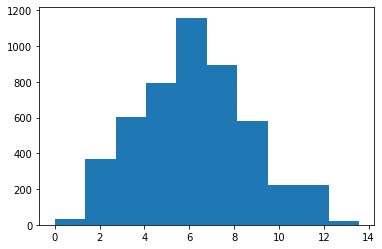

In [11]:
from matplotlib import pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

Xs = np.log(X)
ys = np.log(y)

plt.hist(ys)
print(min(ys))
print(max(ys))
print(np.mean(ys))
print(np.std(ys))

# Let's train an SVR

### Hyper-parameter optimization
(takes about one hour)

In [0]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py

from matplotlib import pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

gs = GridSearchCV(SVR(kernel='poly', max_iter=100000),
                  param_grid={'C':       np.logspace(0, 10, 11, base=2), #-5, 15, 11
                              #'gamma':   np.logspace(-15, -3, 10, base=2), #-15, 3, 10
                              'degree':  [1, 2, 3, 4],
                              'epsilon': [1e0, 1e-1, 1e-2, 1e-3]},
                  scoring='neg_mean_squared_error', return_train_score=True, 
                  verbose=2, n_jobs=-1)
if retrain :
  gs.fit(Xs, ys)
  results = gs.cv_results_
  print(gs.best_params_)
  best_C = gs.best_params_['C']
  best_degree = gs.best_params_['degree']
  # best_gamma = gs.best_params_['gamma']
  best_epsilon = gs.best_params_['epsilon']
else:
  best_C = 32.0
  best_degree = 1
  # best_gamma = 3.0517578125e-05
  best_epsilon = 0.01

Getting the cross-validated error

Fold: 1 Score R^2:  0.9962247879191989  Total MSE:  0.013039274833758906
Fold: 2 Score R^2:  0.9981994289627004  Total MSE:  0.015190704523459407
Fold: 3 Score R^2:  0.9948154866637722  Total MSE:  0.014376160022116538
Fold: 4 Score R^2:  0.9982441256336512  Total MSE:  0.014177466396873362
Fold: 5 Score R^2:  0.9956062845987887  Total MSE:  0.015969793038586762
Fold: 6 Score R^2:  0.9986742108222864  Total MSE:  0.014162196203854994
Fold: 7 Score R^2:  0.9979490520534979  Total MSE:  0.013643545384248766
Fold: 8 Score R^2:  0.9983285056755742  Total MSE:  0.013073243302116237
Fold: 9 Score R^2:  0.9970968443063839  Total MSE:  0.013854619496551602
Fold: 10 Score R^2:  0.9985080170455725  Total MSE:  0.013662581251975527


Text(0.5, 1.0, 'CV MSE = 0.01366, $\\mu=$0.01640, $\\sigma=$0.11573')

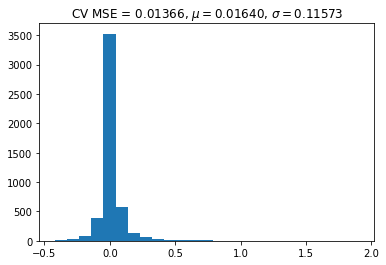

In [13]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
y_y_hat = []
fold = 1
for train_index, test_index in kf.split(X):
  X_train, X_test = Xs[train_index], Xs[test_index]
  y_train, y_test = ys[train_index], ys[test_index]
  
  # clf = SVR(C=best_C, kernel='rbf', gamma=best_gamma, epsilon=best_epsilon, max_iter=100000)
  clf = SVR(C=best_C, kernel='poly', degree=best_degree, epsilon=best_epsilon, max_iter=100000000)
  clf.fit(X_train, y_train)
  y_hat = clf.predict(X_test)
  for k in range(len(y_hat)):
    y_y_hat.append(y_test[k]-y_hat[k])
  print('Fold:', fold, 'Score R^2: ', clf.score(X_test, y_test), ' Total MSE: ', np.mean(np.square(np.array(y_y_hat))))
  fold += 1
y_y_hat = np.array(y_y_hat)  

mse = np.mean(np.square(y_y_hat))
errmu = np.mean(y_y_hat)
stdev = np.std(y_y_hat)
fig = plt.hist(y_y_hat, bins=25)
plt.title('CV MSE = %0.5f, $\mu=$%1.5f, $\sigma=$%1.5f'%(mse,errmu,stdev))

Train with best known parameters

In [14]:
import joblib

if retrain :
  # clf = SVR(C=best_C*best_C, kernel='rbf', gamma=best_gamma, epsilon=best_epsilon, verbose=True, max_iter=1000000)
  clf = SVR(C=best_C, kernel='poly', degree=best_degree, epsilon=best_epsilon, verbose=True, max_iter=100000000)
  # clf = SVR(C=best_C, kernel='linear', epsilon=best_epsilon, verbose=True, max_iter=100000000)
  clf.fit(Xs, ys)
  print(clf.score(Xs, ys))
  joblib.dump(clf, "svr.pkl") 
else:
  clf = joblib.load("svr.pkl")
  print(clf.score(Xs, ys))


0.9977444745210301


## Predict on US data

In [0]:
import datetime

pred_dates = []
pred_vals = []
true_vals = []
days_pred = 7

for index, row in gdf.iterrows():
  if index == 'US':
    i = 0
    while (len(row.values) > i+length):
      seq = row.values[i:i+length+1]
      sdt = list(row.index.values[i:i+length+1])
      if sum(seq[:-1]) > 0:
        inpt = seq[:-1].reshape((1, -1))
        inpt = np.log(inpt)
        targ = seq[-1].reshape((1, -1))
        targ = np.log(targ)
        pred = clf.predict(inpt)
        pred_vals.append(pred)
        true_vals.append(targ)
        datadate = parser.parse(sdt[-1])
        pred_dates.append(str(datadate.date()))

      i += 1
    i = 0
    while (i < days_pred):
      datadate += datetime.timedelta(days=1)
      inpt = np.concatenate((inpt[0,1:], pred)).reshape((1, -1))
      pred = clf.predict(inpt)
      pred_vals.append(pred)
      pred_dates.append(str(datadate.date()))
      i += 1
      
pred_vals = np.exp(np.array(pred_vals).reshape(1,-1))
true_vals = np.exp(np.array(true_vals).reshape(1,-1))
true_std = np.exp(np.array(stdev).reshape(1,-1))


In [0]:
## To see true values and predictions uncoment this:
# print(stdev)
# print(np.exp(stdev))
# for i in range(true_vals.shape[1]):
#   print(true_vals[0,i], pred_vals[0,i])

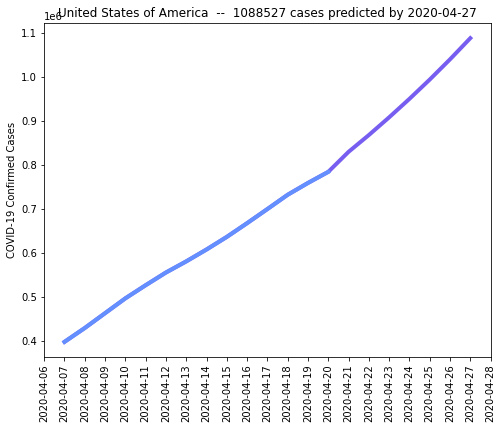

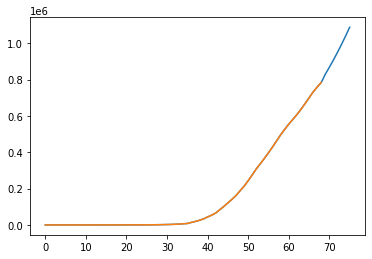

In [17]:
import matplotlib.dates as mdates

k = true_vals.shape[1]
data_plot = pred_vals
data_plot[0,:k] = true_vals[0,:]
data_plot = data_plot[:,-days_disp:]
data_dates = pred_dates[-days_disp:]
cum_sdt_error = np.zeros(pred_vals.shape)
for i in range(len(pred_dates)-k+1):
  cum_sdt_error[0,k+i-1] = true_std[0,0]*i
cum_sdt_error = cum_sdt_error[:,-days_disp:]

days = mdates.DayLocator()
data_dates = pd.to_datetime(data_dates)

cdf = pd.DataFrame()
DF = pd.DataFrame()
cdf['svr_us_data_plot'] = data_plot[0,:]
DF['data_plot'] = data_plot[0,:]
cdf = cdf.set_index(data_dates)
DF = DF.set_index(data_dates)

cdf['svr_us_cum_sdt_error_p'] = data_plot[0,:]+cum_sdt_error[0,:]
cdf['svr_us_cum_sdt_error_n'] = (data_plot[0,:]-cum_sdt_error[0,:]).clip(0)
DF['cum_sdt_error_p'] = data_plot[0,:]+cum_sdt_error[0,:]
DF['cum_sdt_error_n'] = (data_plot[0,:]-cum_sdt_error[0,:]).clip(0)

fig, ax = plt.subplots(figsize=(8,8))
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.plot(DF.index, pred_vals[0,-21:], linewidth=4, color="#785ef0")
plt.plot(DF.index[-21:-days_pred], true_vals[0,-21+days_pred:], linewidth=4, color="#648fff")
ax.xaxis.set_major_locator(days)
plt.ylabel('COVID-19 Confirmed Cases')
plt.title('United States of America  --  ' + str(int(pred_vals[0,-1])) + ' cases predicted by ' + pred_dates[-1])
plt.savefig('us-svr.png', dpi=350, bbox_inches='tight')
plt.show()

plt.figure()
plt.plot(pred_vals[0,:])
plt.plot(true_vals[0,:])
plt.show()

## Predict on NY State

In [0]:
df = pd.read_csv('us-states.csv')
df = df[df['state']=='New York']
df = df.drop(columns=['state','fips','deaths'])
df.set_index('date', inplace=True)

gdf = df.copy()

datadate = parser.parse(df.index[0])
i = 0
while (i < 28):
  datadate -= datetime.timedelta(days=1)
  gdf.loc[str(datadate.date())] = 1e-8
  i += 1

gdf.sort_index(inplace=True)


In [0]:
import datetime

pred_dates = []
pred_vals = []
true_vals = []
days_pred = 7

for index, row in gdf.T.iterrows():
  i = 0
  while (len(row.values) > i+length):
    seq = row.values[i:i+length+1]
    sdt = list(row.index.values[i:i+length+1])
    if seq[0] > 0:
      inpt = seq[:-1].reshape((1, -1))
      inpt = np.log(inpt)
      targ = seq[-1].reshape((1, -1))
      targ = np.log(targ)
      pred = clf.predict(inpt)
      pred_vals.append(pred)
      true_vals.append(targ)
      datadate = parser.parse(sdt[-1])
      pred_dates.append(str(datadate.date()))

    i += 1
  i = 0
  while (i < days_pred):
    datadate += datetime.timedelta(days=1)
    inpt = np.concatenate((inpt[0,1:], pred)).reshape((1, -1))
    pred = clf.predict(inpt)
    pred_vals.append(pred)
    pred_dates.append(str(datadate.date()))
    i += 1
      
pred_vals = np.exp(np.array(pred_vals).reshape(1,-1))
true_vals = np.exp(np.array(true_vals).reshape(1,-1))
true_std = np.exp(np.array(stdev).reshape(1,-1))



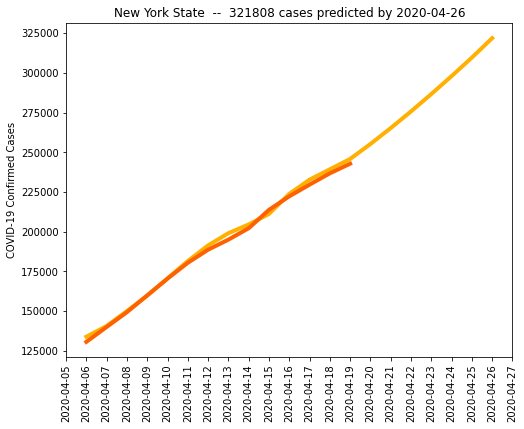

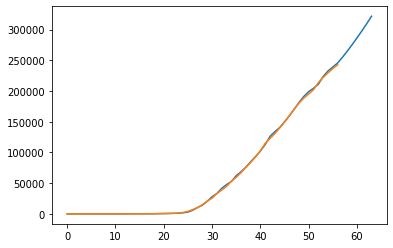

In [20]:
import matplotlib.dates as mdates

k = true_vals.shape[1]
data_plot = pred_vals.copy()
data_plot[0,:k] = true_vals[0,:]
data_plot = data_plot[:,-days_disp:]
data_dates = pred_dates[-days_disp:]
cum_sdt_error = np.zeros(pred_vals.shape)
for i in range(len(pred_dates)-k+1):
  cum_sdt_error[0,k+i-1] = true_std*i
cum_sdt_error = cum_sdt_error[:,-days_disp:]

days = mdates.DayLocator()
data_dates = pd.to_datetime(data_dates)

DF = pd.DataFrame()
cdf['svr_nys_data_plot'] = data_plot[0,:]
DF['data_plot'] = data_plot[0,:]
DF = DF.set_index(data_dates)

fig, ax = plt.subplots(figsize=(8,8))
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.plot(DF.index, pred_vals[0,-21:], linewidth=4, color="#ffb000")
plt.plot(DF.index[-21:-days_pred], true_vals[0,-21+days_pred:], linewidth=4, color="#fe6100")
ax.xaxis.set_major_locator(days)
plt.ylabel('COVID-19 Confirmed Cases')
plt.title('New York State  --  ' + str(int(pred_vals[0,-1])) + ' cases predicted by ' + pred_dates[-1])
plt.savefig('nys-svr.png', dpi=350, bbox_inches='tight')
plt.show()

plt.figure()
plt.plot(pred_vals[0,:])
plt.plot(true_vals[0,:])
plt.show()

cdf['svr_nys_cum_sdt_error_p'] = data_plot[0,:]+cum_sdt_error[0,:]
cdf['svr_nys_cum_sdt_error_n'] = (data_plot[0,:]-cum_sdt_error[0,:]).clip(0)
DF['cum_sdt_error_p'] = data_plot[0,:]+cum_sdt_error[0,:]
DF['cum_sdt_error_n'] = (data_plot[0,:]-cum_sdt_error[0,:]).clip(0)


## Dutchess County

In [0]:
df = pd.read_csv('us-counties.csv')
df = df[df['county']=='Dutchess']
df = df.drop(columns=['state','county','fips','deaths'])
df.set_index('date', inplace=True)

gdf = df.copy()
datadate = parser.parse(df.index[0])
i = 0
while (i < 28):
  datadate -= datetime.timedelta(days=1)
  gdf.loc[str(datadate.date())] = 1e-8
  i += 1

gdf.sort_index(inplace=True)


In [0]:
import datetime

pred_dates = []
pred_vals = []
true_vals = []
days_pred = 7

for index, row in gdf.T.iterrows():
  i = 0
  while (len(row.values) > i+length):
    seq = row.values[i:i+length+1]
    sdt = list(row.index.values[i:i+length+1])
    if seq[0] > 0:
      inpt = seq[:-1].reshape((1, -1))
      inpt = np.log(inpt)
      targ = seq[-1].reshape((1, -1))
      targ = np.log(targ)
      pred = clf.predict(inpt)
      pred_vals.append(pred)
      true_vals.append(targ)
      datadate = parser.parse(sdt[-1])
      pred_dates.append(str(datadate.date()))

    i += 1
  i = 0
  while (i < days_pred):
    datadate += datetime.timedelta(days=1)
    inpt = np.concatenate((inpt[0,1:], pred)).reshape((1, -1))
    pred = clf.predict(inpt)
    pred_vals.append(pred)
    pred_dates.append(str(datadate.date()))
    i += 1

pred_vals = np.exp(np.array(pred_vals).reshape(1,-1))
true_vals = np.exp(np.array(true_vals).reshape(1,-1))
true_std = np.exp(np.array(stdev).reshape(1,-1))


In [0]:
## To see true values and predictions uncoment this:
# print(stdev)
# print(np.exp(stdev))
# for i in range(true_vals.shape[1]):
#   print(true_vals[0,i], pred_vals[0,i])

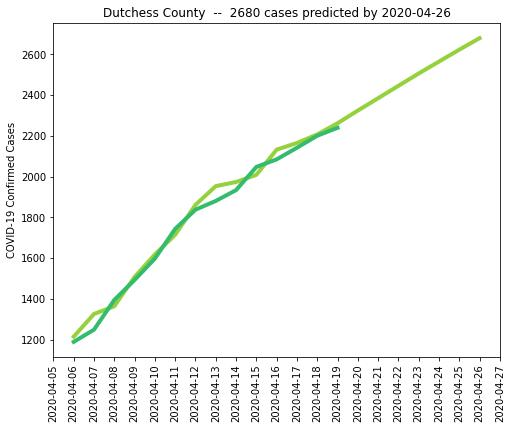

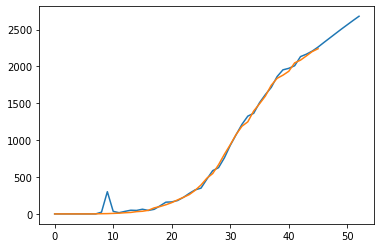

In [24]:
import matplotlib.dates as mdates

k = true_vals.shape[1]
data_plot = pred_vals.copy()
data_plot[0,:k] = true_vals[0,:]
data_plot = data_plot[:,-days_disp:]
data_dates = pred_dates[-days_disp:]
cum_sdt_error = np.zeros(pred_vals.shape)
for i in range(len(pred_dates)-k+1):
  cum_sdt_error[0,k+i-1] = true_std*i
cum_sdt_error = cum_sdt_error[:,-days_disp:]

days = mdates.DayLocator()
data_dates = pd.to_datetime(data_dates)

DF = pd.DataFrame()
cdf['svr_dc_data_plot'] = data_plot[0,:]
DF['data_plot'] = data_plot[0,:]
DF = DF.set_index(data_dates)

fig, ax = plt.subplots(figsize=(8,8))
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.plot(DF.index, pred_vals[0,-21:], linewidth=4, color="#95d13c")
plt.plot(DF.index[-21:-days_pred], true_vals[0,-21+days_pred:], linewidth=4, color="#34bc6e")
ax.xaxis.set_major_locator(days)
plt.ylabel('COVID-19 Confirmed Cases')
plt.title('Dutchess County  --  ' + str(int(pred_vals[0,-1])) + ' cases predicted by ' + pred_dates[-1])
plt.savefig('dutchess-svr.png', dpi=350, bbox_inches='tight')
plt.show()

plt.figure()
plt.plot(pred_vals[0,:])
plt.plot(true_vals[0,:])
plt.show()

cdf['svr_dc_cum_sdt_error_p'] = data_plot[0,:]+cum_sdt_error[0,:]
cdf['svr_dc_cum_sdt_error_n'] = (data_plot[0,:]-cum_sdt_error[0,:]).clip(0)
DF['cum_sdt_error_p'] = data_plot[0,:]+cum_sdt_error[0,:]
DF['cum_sdt_error_n'] = (data_plot[0,:]-cum_sdt_error[0,:]).clip(0)


In [25]:
cdf

,svr_us_data_plot,svr_us_cum_sdt_error_p,svr_us_cum_sdt_error_n,svr_nys_data_plot,svr_nys_cum_sdt_error_p,svr_nys_cum_sdt_error_n,svr_dc_data_plot,svr_dc_cum_sdt_error_p,svr_dc_cum_sdt_error_n
2020-04-07,3.975050e+05,3.975050e+05,3.975050e+05,130703.000000,130703.000000,130703.000000,1189.000000,1189.000000,1189.000000
2020-04-08,4.290520e+05,4.290520e+05,4.290520e+05,140081.000000,140081.000000,140081.000000,1249.000000,1249.000000,1249.000000
2020-04-09,4.627800e+05,4.627800e+05,4.627800e+05,149401.000000,149401.000000,149401.000000,1395.000000,1395.000000,1395.000000
2020-04-10,4.965350e+05,4.965350e+05,4.965350e+05,159937.000000,159937.000000,159937.000000,1493.000000,1493.000000,1493.000000
2020-04-11,5.263960e+05,5.263960e+05,5.263960e+05,170512.000000,170512.000000,170512.000000,1598.000000,1598.000000,1598.000000
2020-04-12,5.553130e+05,5.553130e+05,5.553130e+05,180458.000000,180458.000000,180458.000000,1744.000000,1744.000000,1744.000000
2020-04-13,5.806190e+05,5.806190e+05,5.806190e+05,188694.000000,188694.000000,188694.000000,1838.000000,1838.000000,1838.000000
2020-04-14,6.076700e+05,6.076700e+05,6.076700e+05,195031.000000,195031.000000,195031.000000,1881.000000,1881.000000,1881.000000
2020-04-15,6.363500e+05,6.363500e+05,6.363500e+05,202208.000000,202208.000000,202208.000000,1934.000000,1934.000000,1934.000000
2020-04-16,6.675920e+05,6.675920e+05,6.675920e+05,213779.000000,213779.000000,213779.000000,2048.000000,2048.000000,2048.000000


# Lets train an LSTM

### Hyper-parameter optimization
(this will take about two hours)

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Input, Reshape, BatchNormalization, Bidirectional
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# pipeline
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='r2'):
  gs = GridSearchCV(
      estimator=model,
      param_grid=param_grid, 
      cv=cv, 
      n_jobs=-1, 
      scoring=scoring_fit,
      verbose=2
  )
  fitted_model = gs.fit(X_train_data, y_train_data)
  
  pred = fitted_model.predict(X_test_data)
  
  return fitted_model, pred

# Readying neural network model
def build_lstm(units = 4,
              dropout_rate = 0.1,
              optimizer = 'adam',
              loss = 'mean_squared_error'):
  net = Sequential()
  net.add(Input((X.shape[1],)))
  net.add(Reshape((1, X.shape[1])))
  net.add(BatchNormalization())
  net.add(Bidirectional(LSTM(units, dropout=dropout_rate, recurrent_dropout=dropout_rate)))
  net.add(Dense(1, activation='relu'))
  net.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    
  return net

param_grid = {'epochs' : [10, 20],
              'batch_size' : [16, 32],
              'dropout_rate' : [0.1, 0.2],
              'units' : [512, 1024]}

model = KerasClassifier(build_fn = build_lstm, verbose=1)

X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.5, random_state=42)

if retrain :
  model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=3, scoring_fit='neg_mean_squared_error')
  print(model.best_score_)
  print(model.best_params_)

  lstm_best_params = model.best_params_
else:
  lstm_best_params = {'batch_size': 16, 
                      'dropout_rate': 0.1, 
                      'epochs': 20, 
                      'units': 512}

In [27]:
inpt = Input((X.shape[1],))
rnpt = Reshape((1, X.shape[1]))(inpt)
bn = BatchNormalization()(rnpt)
rnn = Bidirectional(LSTM(lstm_best_params['units'], 
           dropout=lstm_best_params['dropout_rate'], 
           recurrent_dropout=lstm_best_params['dropout_rate']))(bn)
otpt = Dense(1, activation='relu')(rnn)
net = Model(inpt, otpt)
print(net.summary())
net.compile(loss='mean_squared_error', optimizer='adam', 
            metrics=['mse', 'mae', 'cosine_proximity'])
hist = net.fit(Xs, ys, batch_size=lstm_best_params['batch_size'], 
               epochs=lstm_best_params['epochs'], validation_split=0.1)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
reshape (Reshape)            (None, 1, 21)             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 21)             84        
_________________________________________________________________
bidirectional (Bidirectional (None, 1024)              2187264   
_________________________________________________________________
dense (Dense)                (None, 1)                 1025      
Total params: 2,188,373
Trainable params: 2,188,331
Non-trainable params: 42
_________________________________________________________________
None
Train on 4411 samples, validate on 491 samples
Epoch 1/20
4411/4411 [==============================] - 14s 3ms/

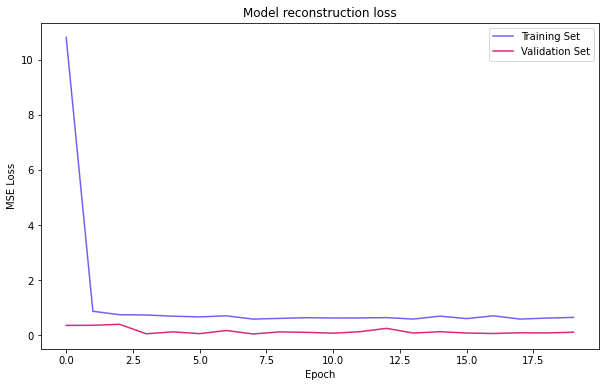

In [28]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model reconstruction loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Validation Set'], loc='upper right')
# plt.savefig('ch.7.ae.mnist.loss.png', dpi=350, bbox_inches='tight')
plt.show()

This just calculates a confidence interval by means of the standard error

Fold: 0 Score R^2:  0.9684166542294861  Total MSE:  0.105662905
Fold: 1 Score R^2:  0.9932750951232142  Total MSE:  0.08414624
Fold: 2 Score R^2:  0.9800560319226262  Total MSE:  0.07374861
Fold: 3 Score R^2:  0.9859048971602854  Total MSE:  0.079786405
Fold: 4 Score R^2:  0.9741670270189622  Total MSE:  0.08800092
Fold: 5 Score R^2:  0.9863744643120359  Total MSE:  0.08186184
Fold: 6 Score R^2:  0.9883789670288974  Total MSE:  0.07896704
Fold: 7 Score R^2:  0.9918044867577197  Total MSE:  0.074315995
Fold: 8 Score R^2:  0.9771666827672578  Total MSE:  0.08055358
Fold: 9 Score R^2:  0.9858340754513734  Total MSE:  0.08272201


Text(0.5, 1.0, 'CV MSE = 0.08272, $\\mu=$0.02978, $\\sigma=$0.28607')

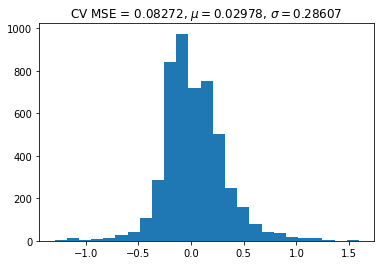

In [29]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
kf = KFold(n_splits=10)
y_y_hat = []
fold = 0
for train_index, test_index in kf.split(X):
  X_train, X_test = Xs[train_index], Xs[test_index]
  y_train, y_test = ys[train_index], ys[test_index]

  net = None
  net = Model(inpt, otpt)
  net.compile(loss='mean_squared_error', optimizer='adam')
  net.fit(X_train, y_train, batch_size=lstm_best_params['batch_size'], 
          epochs=lstm_best_params['epochs'], verbose=0)
  y_hat = net.predict(X_test)
  for k in range(len(y_hat)):
    y_y_hat.append(y_test[k]-y_hat[k])
  print('Fold:', fold, 'Score R^2: ', r2_score(y_hat.ravel(), y_test), ' Total MSE: ', np.mean(np.square(np.array(y_y_hat))))
  fold += 1

y_y_hat = np.array(y_y_hat)  

mse = np.mean(np.square(y_y_hat))
errmu = np.mean(y_y_hat)
stdev = np.std(y_y_hat)
fig = plt.hist(y_y_hat, bins=25)
plt.title('CV MSE = %0.5f, $\mu=$%1.5f, $\sigma=$%1.5f'%(mse,errmu,stdev))

In [30]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Input, Reshape, BatchNormalization, Bidirectional
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import load_model

mdlinpt = Input((X.shape[1],))
rnpt = Reshape((1, X.shape[1]))(mdlinpt)
bn = BatchNormalization()(rnpt)
rnn = Bidirectional(LSTM(lstm_best_params['units'], dropout=lstm_best_params['dropout_rate'], 
           recurrent_dropout=lstm_best_params['dropout_rate']))(bn)
bn = BatchNormalization()(rnn)
otpt = Dense(1, activation='elu')(bn)
net = Model(mdlinpt, otpt)
print(net.summary())
if retrain :
  net.compile(loss='mean_squared_error', optimizer='adam', 
              metrics=['mse', 'mae', 'cosine_proximity'])

  reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10,  
                                min_delta=1e-4, mode='min')

  stop_alg = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

  hist = net.fit(Xs, ys, batch_size=lstm_best_params['batch_size'], epochs=1000, 
                callbacks=[stop_alg, reduce_lr], validation_split=0.1)

  net.save_weights("net.hdf5")
else:
  net.load_weights("net.hdf5")


Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 1, 21)             0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 21)             84        
_________________________________________________________________
bidirectional_1 (Bidirection (None, 1024)              2187264   
_________________________________________________________________
batch_normalization_2 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1025      
Total params: 2,192,469
Trainable params: 2,190,379
Non-trainable params: 2,090
____________________________________________

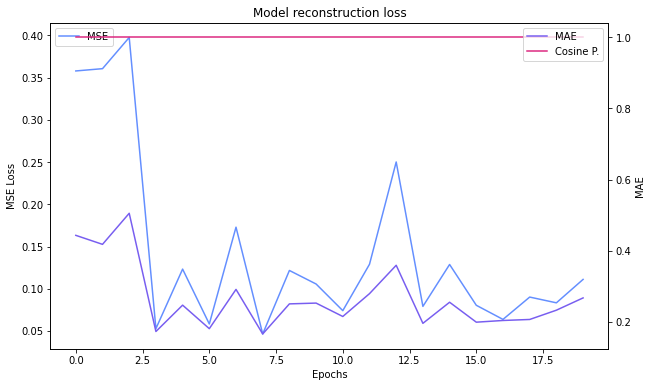

In [31]:
import matplotlib.pyplot as plt

# fig = plt.figure()
fig, ax1 = plt.subplots(figsize=(10,6))

ax2 = ax1.twinx()
ax1.plot(hist.history['val_mse'], color='#648fff', label='MSE')
ax2.plot(hist.history['val_mae'], color='#785ef0', label='MAE')
ax2.plot(hist.history['val_cosine_proximity'], color='#dc267f', label='Cosine P.')

ax1.set_xlabel('Epochs')
ax1.set_ylabel('MSE Loss')
ax2.set_ylabel('MAE')
ax2.legend(loc='upper right')
ax1.legend(loc='upper left')


plt.title('Model reconstruction loss')
plt.show()

### USA predictions

In [0]:
df = pd.read_csv('time_series_covid19_confirmed_global.csv')
df = df.drop(columns=['Province/State', 'Lat', 'Long'])

df = df.groupby(['Country/Region']).sum()
gdf = df.copy()


In [0]:
import datetime

pred_dates = []
pred_vals = []
true_vals = []
days_pred = 7
days_disp = 21
pred = 0

for index, row in gdf.iterrows():
  if index == 'US':
    i = 0
    while (len(row.values) > i+length):
      seq = row.values[i:i+length+1]
      sdt = list(row.index.values[i:i+length+1])
      if seq[0] > 0:
        inpt = seq[:-1].reshape((1, -1))
        inpt = np.log(inpt)
        targ = seq[-1].reshape((1, -1))
        targ = np.log(targ)
        pred = max(pred, net.predict(inpt)[0]) # sneaky pred_vals.append(x)
        pred_vals.append(pred)
        true_vals.append(targ)
        datadate = parser.parse(sdt[-1])
        pred_dates.append(str(datadate.date()))
      i += 1
    i = 0
    
    while (i < days_pred):
      datadate += datetime.timedelta(days=1)
      inpt = np.concatenate((inpt[0,1:], pred)).reshape((1, -1))
      pred = max(pred, net.predict(inpt)[0])
      pred_vals.append(pred)
      pred_dates.append(str(datadate.date()))
      i += 1

pred_vals = np.exp(np.array(pred_vals).reshape(1,-1))
true_vals = np.exp(np.array(true_vals).reshape(1,-1))
true_std = np.exp(np.array(stdev).reshape(1,-1))


In [0]:
# # To see true values and predictions uncoment this:
# print(stdev)
# print(np.exp(stdev))
# for i in range(pred_vals.shape[1]):
#   if i < true_vals.shape[1]:
#     print(true_vals[0,i], pred_vals[0,i])
#   else:
#     print(pred_vals[0,i])


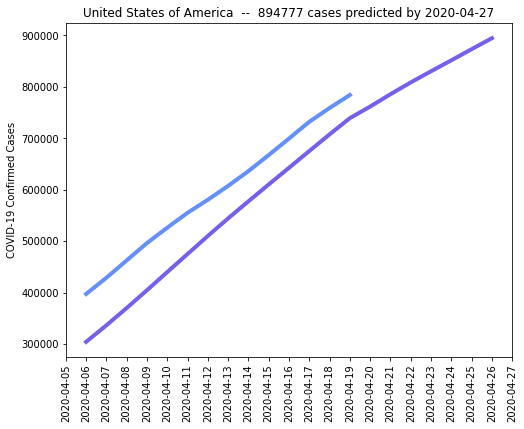

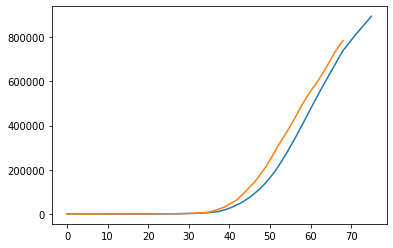

In [34]:
fig, ax = plt.subplots(figsize=(8,8))
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.plot(DF.index, pred_vals[0,-21:], linewidth=4, color="#785ef0")
plt.plot(DF.index[-21:-days_pred], true_vals[0,-21+days_pred:], linewidth=4, color="#648fff")
ax.xaxis.set_major_locator(days)
plt.ylabel('COVID-19 Confirmed Cases')
plt.title('United States of America  --  ' + str(int(pred_vals[0,-1])) + ' cases predicted by ' + pred_dates[-1])
plt.savefig('us-lstm.png', dpi=350, bbox_inches='tight')
plt.show()

plt.figure()
plt.plot(pred_vals[0,:])
plt.plot(true_vals[0,:])
plt.show()

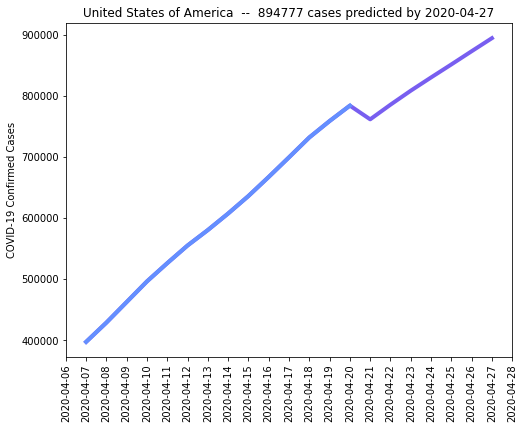

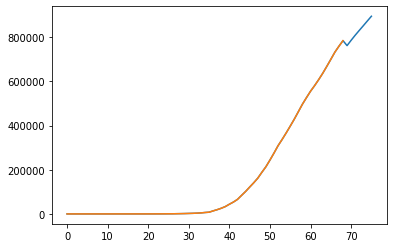

In [35]:
import matplotlib.dates as mdates

k = true_vals.shape[1]
data_plot = pred_vals
data_plot[0,:k] = true_vals[0,:]
data_plot = data_plot[:,-days_disp:]
data_dates = pred_dates[-days_disp:]
cum_sdt_error = np.zeros(pred_vals.shape)
for i in range(len(pred_dates)-k+1):
  cum_sdt_error[0,k+i-1] = true_std*i
cum_sdt_error = cum_sdt_error[:,-days_disp:]


days = mdates.DayLocator()
data_dates = pd.to_datetime(data_dates)

DF = pd.DataFrame()
cdf['lstm_us_data_plot'] = data_plot[0,:]
DF['data_plot'] = data_plot[0,:]
DF = DF.set_index(data_dates)

fig, ax = plt.subplots(figsize=(8,8))
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.plot(DF.index, pred_vals[0,-21:], linewidth=4, color="#785ef0")
plt.plot(DF.index[-21:-days_pred], true_vals[0,-21+days_pred:], linewidth=4, color="#648fff")
ax.xaxis.set_major_locator(days)
plt.ylabel('COVID-19 Confirmed Cases')
plt.title('United States of America  --  ' + str(int(pred_vals[0,-1])) + ' cases predicted by ' + pred_dates[-1])
# plt.savefig('us-lstm.png', dpi=350, bbox_inches='tight')
plt.show()

plt.figure()
plt.plot(pred_vals[0,:])
plt.plot(true_vals[0,:])
plt.show()

cdf['lstm_us_cum_sdt_error_p'] = data_plot[0,:]+cum_sdt_error[0,:]
cdf['lstm_us_cum_sdt_error_n'] = (data_plot[0,:]-cum_sdt_error[0,:]).clip(0)
DF['cum_sdt_error_p'] = data_plot[0,:]+cum_sdt_error[0,:]
DF['cum_sdt_error_n'] = (data_plot[0,:]-cum_sdt_error[0,:]).clip(0)


## NYS predictions

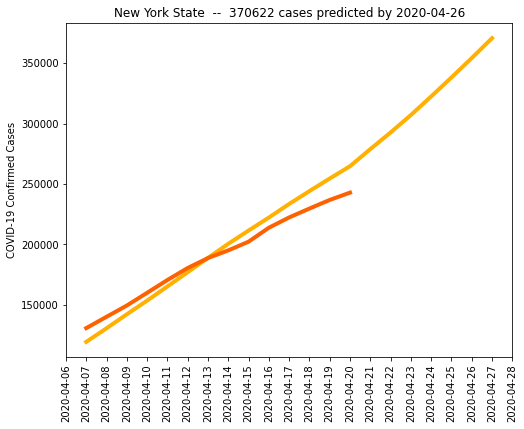

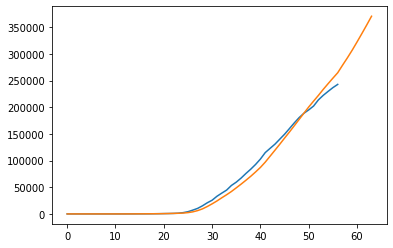

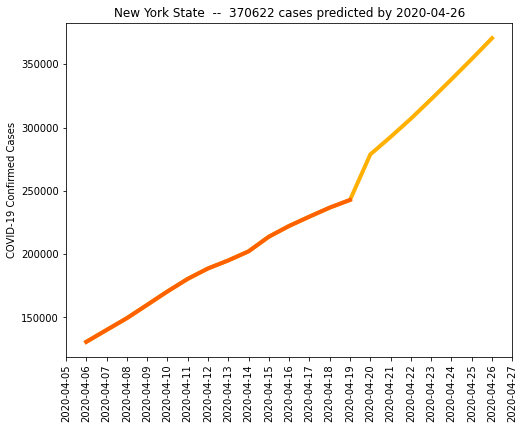

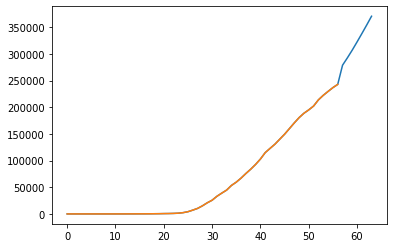

In [36]:
df = pd.read_csv('us-states.csv')
df = df[df['state']=='New York']
df = df.drop(columns=['state','fips','deaths'])
df.set_index('date', inplace=True)

gdf = df.copy()

datadate = parser.parse(df.index[0])
i = 0
while (i < 28):
  datadate -= datetime.timedelta(days=1)
  gdf.loc[str(datadate.date())] = 1  # need this due to the log transformation
  i += 1

gdf.sort_index(inplace=True)

pred_dates = []
pred_vals = []
true_vals = []
days_pred = 7
days_disp = 21 
pred = 0

for index, row in gdf.T.iterrows():
  i = 0
  while (len(row.values) > i+length):
    seq = row.values[i:i+length+1]
    sdt = list(row.index.values[i:i+length+1])
    if seq[0] > 0:
      inpt = seq[:-1].reshape((1, -1))
      inpt = np.log(inpt)
      targ = seq[-1].reshape((1, -1))
      targ = np.log(targ)
      pred = max(pred, net.predict(inpt)[0])
      pred_vals.append(pred)
      true_vals.append(targ)
      datadate = parser.parse(sdt[-1])
      pred_dates.append(str(datadate.date()))

    i += 1
  i = 0
  
  while (i < days_pred):
    datadate += datetime.timedelta(days=1)
    inpt = np.concatenate((inpt[0,1:], pred)).reshape((1, -1))
    pred = max(pred, net.predict(inpt)[0])
    x = max(pred, inpt[0][-1]).reshape((1,)) # sneaky pred_vals.append(x)
    pred_vals.append(pred)
    pred_dates.append(str(datadate.date()))
    i += 1

pred_vals = np.array(pred_vals).reshape(1,-1)
true_vals = np.array(true_vals).reshape(1,-1)
true_std = np.array(stdev).reshape(1,-1)

pred_vals = np.exp(pred_vals.astype(np.float64))
true_vals = np.exp(true_vals)
true_std = np.exp(stdev)

# # To see true values and predictions uncoment this:
# print(stdev)
# print(np.exp(stdev))
# for i in range(pred_vals.shape[1]):
#   if i < true_vals.shape[1]:
#     print(true_vals[0,i], pred_vals[0,i])
#   else:
#     print(pred_vals[0,i])

fig, ax = plt.subplots(figsize=(8,8))
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.plot(DF.index, pred_vals[0,-21:], linewidth=4, color="#ffb000")
plt.plot(DF.index[-21:-days_pred], true_vals[0,-21+days_pred:], linewidth=4, color="#fe6100")
ax.xaxis.set_major_locator(days)
plt.ylabel('COVID-19 Confirmed Cases')
plt.title('New York State  --  ' + str(int(pred_vals[0,-1])) + ' cases predicted by ' + pred_dates[-1])
plt.savefig('nys-lstm.png', dpi=350, bbox_inches='tight')
plt.show()

plt.figure()
plt.plot(true_vals[0,:])
plt.plot(pred_vals[0,:])
plt.show()


import matplotlib.dates as mdates

k = true_vals.shape[1]
data_plot = pred_vals
data_plot[0,:k] = true_vals[0,:]
data_plot = data_plot[:,-days_disp:]
data_dates = pred_dates[-days_disp:]
cum_sdt_error = np.zeros(pred_vals.shape)
for i in range(len(pred_dates)-k+1):
  cum_sdt_error[0,k+i-1] = true_std*i
cum_sdt_error = cum_sdt_error[:,-days_disp:]


days = mdates.DayLocator()
data_dates = pd.to_datetime(data_dates)

DF = pd.DataFrame()
cdf['lstm_nys_data_plot'] = data_plot[0,:]
DF['data_plot'] = data_plot[0,:]
DF = DF.set_index(data_dates)

fig, ax = plt.subplots(figsize=(8,8))
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.plot(DF.index, pred_vals[0,-21:], linewidth=4, color="#ffb000")
plt.plot(DF.index[-21:-days_pred], true_vals[0,-21+days_pred:], linewidth=4, color="#fe6100")
ax.xaxis.set_major_locator(days)
plt.ylabel('COVID-19 Confirmed Cases')
plt.title('New York State  --  ' + str(int(pred_vals[0,-1])) + ' cases predicted by ' + pred_dates[-1])
# plt.savefig('nys-lstm.png', dpi=350, bbox_inches='tight')
plt.show()

plt.figure()
plt.plot(pred_vals[0,:])
plt.plot(true_vals[0,:])
plt.show()


cdf['lstm_nys_cum_sdt_error_p'] = np.array(data_plot[0,:]+cum_sdt_error[0,:], dtype=float)
cdf['lstm_nys_cum_sdt_error_n'] = np.array(data_plot[0,:]-cum_sdt_error[0,:], dtype=float).clip(0)
DF['cum_sdt_error_p'] = np.array(data_plot[0,:]+cum_sdt_error[0,:], dtype=float)
DF['cum_sdt_error_n'] = np.array(data_plot[0,:]-cum_sdt_error[0,:], dtype=float).clip(0)


## Ducthess county

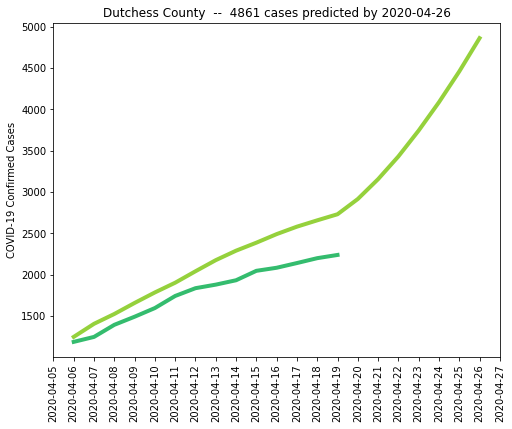

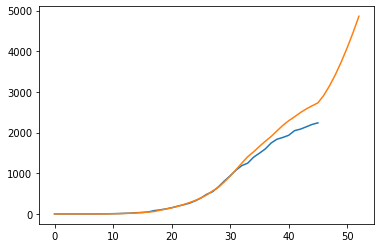

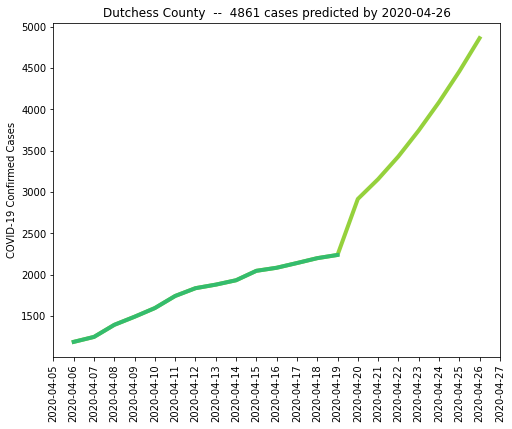

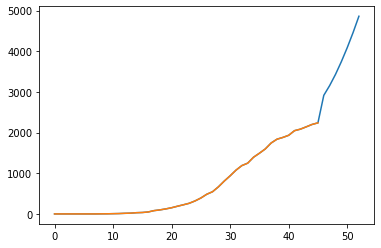

In [37]:
df = pd.read_csv('us-counties.csv')
df = df[df['county']=='Dutchess']
df = df.drop(columns=['state','county','fips','deaths'])
df.set_index('date', inplace=True)

gdf = df.copy()

datadate = parser.parse(df.index[0])
i = 0
while (i < 28):
  datadate -= datetime.timedelta(days=1)
  gdf.loc[str(datadate.date())] = 1
  i += 1

gdf.sort_index(inplace=True)


pred_dates = []
pred_vals = []
true_vals = []
days_pred = 7
pred = 0

for index, row in gdf.T.iterrows():
  i = 0
  while (len(row.values) > i+length):
    seq = row.values[i:i+length+1]
    sdt = list(row.index.values[i:i+length+1])
    if seq[0] > 0:
      inpt = seq[:-1].reshape((1, -1))
      inpt = np.log(inpt)
      targ = seq[-1].reshape((1, -1))
      targ = np.log(targ)      
      pred = max(pred, net.predict(inpt)[0])
      pred_vals.append(pred)
      true_vals.append(targ)
      datadate = parser.parse(sdt[-1])
      pred_dates.append(str(datadate.date()))

    i += 1
  i = 0
  
  while (i < days_pred):
    datadate += datetime.timedelta(days=1)
    inpt = np.concatenate((inpt[0,1:], pred)).reshape((1, -1))
    pred = max(pred, net.predict(inpt)[0])
    pred_vals.append(pred)
    pred_dates.append(str(datadate.date()))
    i += 1

pred_vals = np.array(pred_vals).reshape(1,-1)
true_vals = np.array(true_vals).reshape(1,-1)
true_std = np.array(stdev).reshape(1,-1)

pred_vals = np.exp(pred_vals.astype(np.float64))
true_vals = np.exp(true_vals)
true_std = np.exp(stdev)

# # To see true values and predictions uncoment this:
# print(stdev)
# print(np.exp(stdev))
# for i in range(pred_vals.shape[1]):
#   if i < true_vals.shape[1]:
#     print(true_vals[0,i], pred_vals[0,i])
#   else:
#     print(pred_vals[0,i])

fig, ax = plt.subplots(figsize=(8,8))
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.plot(DF.index, pred_vals[0,-21:], linewidth=4, color="#95d13c")
plt.plot(DF.index[-21:-days_pred], true_vals[0,-21+days_pred:], linewidth=4, color="#34bc6e")
ax.xaxis.set_major_locator(days)
plt.ylabel('COVID-19 Confirmed Cases')
plt.title('Dutchess County  --  ' + str(int(pred_vals[0,-1])) + ' cases predicted by ' + pred_dates[-1])
plt.savefig('dutchess-lstm.png', dpi=350, bbox_inches='tight')
plt.show()

plt.figure()
plt.plot(true_vals[0,:])
plt.plot(pred_vals[0,:])
plt.show()


####
import matplotlib.dates as mdates

k = true_vals.shape[1]
data_plot = pred_vals
data_plot[0,:k] = true_vals[0,:]
data_plot = data_plot[:,-days_disp:]
data_dates = pred_dates[-days_disp:]
cum_sdt_error = np.zeros(pred_vals.shape)
for i in range(len(pred_dates)-k+1):
  cum_sdt_error[0,k+i-1] = true_std*i
cum_sdt_error = cum_sdt_error[:,-days_disp:]

days = mdates.DayLocator()
data_dates = pd.to_datetime(data_dates)

DF = pd.DataFrame()
cdf['lstm_dc_data_plot'] = data_plot[0,:]
DF['data_plot'] = data_plot[0,:]
DF = DF.set_index(data_dates)

fig, ax = plt.subplots(figsize=(8,8))
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.plot(DF.index, pred_vals[0,-21:], linewidth=4, color="#95d13c")
plt.plot(DF.index[-21:-days_pred], true_vals[0,-21+days_pred:], linewidth=4, color="#34bc6e")
ax.xaxis.set_major_locator(days)
plt.ylabel('COVID-19 Confirmed Cases')
plt.title('Dutchess County  --  ' + str(int(pred_vals[0,-1])) + ' cases predicted by ' + pred_dates[-1])
# plt.savefig('dutchess-lstm.png', dpi=350, bbox_inches='tight')
plt.show()

plt.figure()
plt.plot(pred_vals[0,:])
plt.plot(true_vals[0,:])
plt.show()

cdf['lstm_dc_cum_sdt_error_p'] = np.array(data_plot[0,:]+cum_sdt_error[0,:], dtype=float)
cdf['lstm_dc_cum_sdt_error_n'] = np.array(data_plot[0,:]-cum_sdt_error[0,:], dtype=float).clip(0)
DF['cum_sdt_error_p'] = np.array(data_plot[0,:]+cum_sdt_error[0,:], dtype=float)
DF['cum_sdt_error_n'] = np.array(data_plot[0,:]-cum_sdt_error[0,:], dtype=float).clip(0)


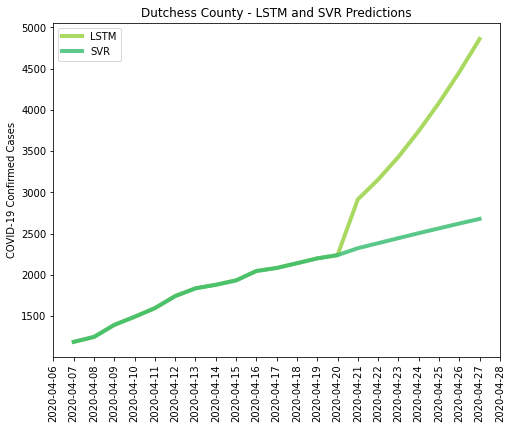

In [38]:

fig, ax = plt.subplots(figsize=(8,8))
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.plot(cdf['lstm_dc_data_plot'], linewidth=4, color="#95d13c", alpha=0.8, label='LSTM')
plt.plot(cdf['svr_dc_data_plot'], linewidth=4, color="#34bc6e", alpha=0.8, label='SVR')
ax.legend(loc='upper left')
plt.ylabel('COVID-19 Confirmed Cases')
plt.title('Dutchess County - LSTM and SVR Predictions')

plt.fill_between(cdf.index, cdf['svr_dc_cum_sdt_error_p'], 
                 cdf['svr_dc_cum_sdt_error_n'], 
                 alpha=0.1, color="#34bc6e")
plt.fill_between(cdf.index, cdf['lstm_dc_cum_sdt_error_p'], 
                 cdf['lstm_dc_cum_sdt_error_n'], 
                 alpha=0.1, color="#95d13c")

ax.xaxis.set_major_locator(days)
plt.savefig('dutchess.png', dpi=350, bbox_inches='tight')


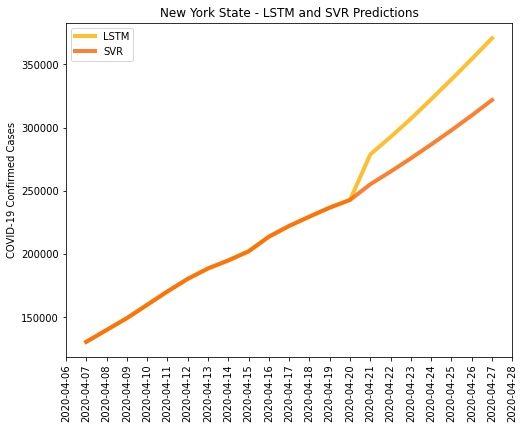

In [39]:
fig, ax = plt.subplots(figsize=(8,8))
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.plot(cdf['lstm_nys_data_plot'], linewidth=4, color="#ffb000", alpha=0.8, label='LSTM')
plt.plot(cdf['svr_nys_data_plot'], linewidth=4, color="#fe6100", alpha=0.8, label='SVR')
ax.legend(loc='upper left')
plt.ylabel('COVID-19 Confirmed Cases')
plt.title('New York State - LSTM and SVR Predictions')

plt.fill_between(cdf.index, cdf['lstm_nys_cum_sdt_error_p'], 
                 cdf['lstm_nys_cum_sdt_error_n'], 
                 alpha=0.1, color="#ffb000")
plt.fill_between(cdf.index, cdf['svr_nys_cum_sdt_error_p'], 
                 cdf['svr_nys_cum_sdt_error_n'], 
                 alpha=0.1, color="#fe6100")

ax.xaxis.set_major_locator(days)
plt.savefig('nys.png', dpi=350, bbox_inches='tight')


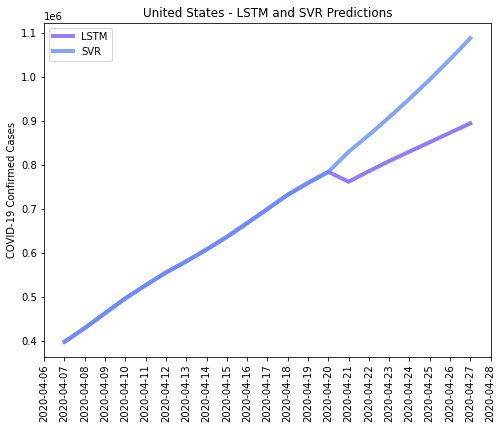

In [40]:
fig, ax = plt.subplots(figsize=(8,8))
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.plot(cdf['lstm_us_data_plot'], linewidth=4, color="#785ef0", alpha=0.8, label='LSTM')
plt.plot(cdf['svr_us_data_plot'], linewidth=4, color="#648fff", alpha=0.8, label='SVR')
ax.legend(loc='upper left')
plt.ylabel('COVID-19 Confirmed Cases')
plt.title('United States - LSTM and SVR Predictions')

plt.fill_between(cdf.index, cdf['lstm_us_cum_sdt_error_p'], 
                 cdf['lstm_us_cum_sdt_error_n'], 
                 alpha=0.1, color="#785ef0")
plt.fill_between(cdf.index, cdf['svr_us_cum_sdt_error_p'], 
                 cdf['svr_us_cum_sdt_error_n'], 
                 alpha=0.1, color="#648fff")

ax.xaxis.set_major_locator(days)
plt.savefig('us.png', dpi=350, bbox_inches='tight')
